In [2]:
import numpy as np
import librosa
import librosa.display
import os
import IPython.display as ipd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Loading Audio Files

In [2]:
def return_audio_array(file, dirpath, emotion):
    emotion_folder = os.walk(dirpath)
    emotions = list(emotion_folder)[0][1]
    for i in emotions:
        if i == emotion:
            path = os.path.join(dirpath, i, file)
            return librosa.load(path)

dirpath = r"D:\SER-RO-MAHA\Sample Speech Data"

In [3]:
neutral, sr = return_audio_array('03-01-01-01-01-01-01.wav', dirpath, 'Neutral')
happy, _ = return_audio_array('03-01-03-01-01-01-01.wav', dirpath, 'Happy')
sad, _ = return_audio_array('03-01-04-01-01-01-01.wav', dirpath, 'Sad')
angry, _ = return_audio_array('03-01-05-01-01-01-01.wav', dirpath, 'Anger')
fear, _ = return_audio_array('03-01-06-01-01-01-01.wav', dirpath, 'Fear')
disgust, _ = return_audio_array('03-01-07-01-01-01-01.wav', dirpath, 'Disgust')
surprise, _ = return_audio_array('03-01-08-01-01-01-01.wav', dirpath, 'Surprise')

### Displaying Audio

In [5]:
neutral.shape

(72839,)

In [6]:
def display(signal, sr):
    return ipd.Audio(signal, rate=sr)

display(surprise, sr)

# Mel Filter Bands

In [29]:
filter_banks = librosa.filters.mel(sr=22050, n_fft=2048, n_mels=90)
filter_banks.shape

(90, 1025)

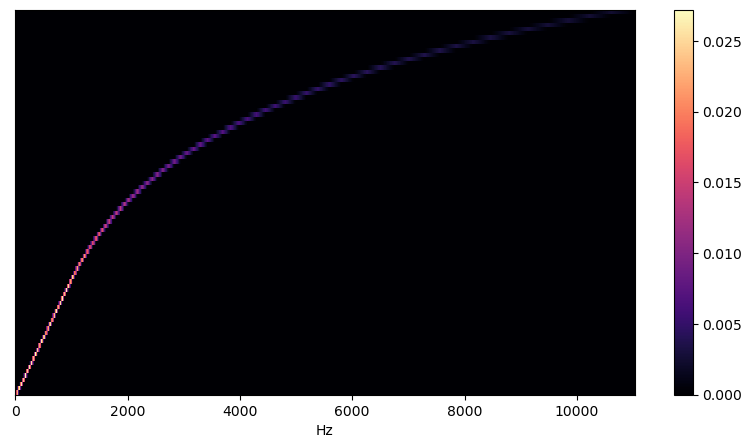

In [30]:
plt.figure(figsize=(10, 5))
librosa.display.specshow(filter_banks,
                         sr=22050,
                        x_axis='linear')
plt.colorbar()

# Mel Spectrogram

In [19]:
def mel_spectrogram(signal, sr):
    mel_spec = librosa.feature.melspectrogram(signal, sr=sr, n_fft=1024, n_mels=90, hop_length=512)
    log_mel_spec = librosa.power_to_db(mel_spec)
    plt.figure(figsize=(15, 5))
    librosa.display.specshow(log_mel_spec, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar()

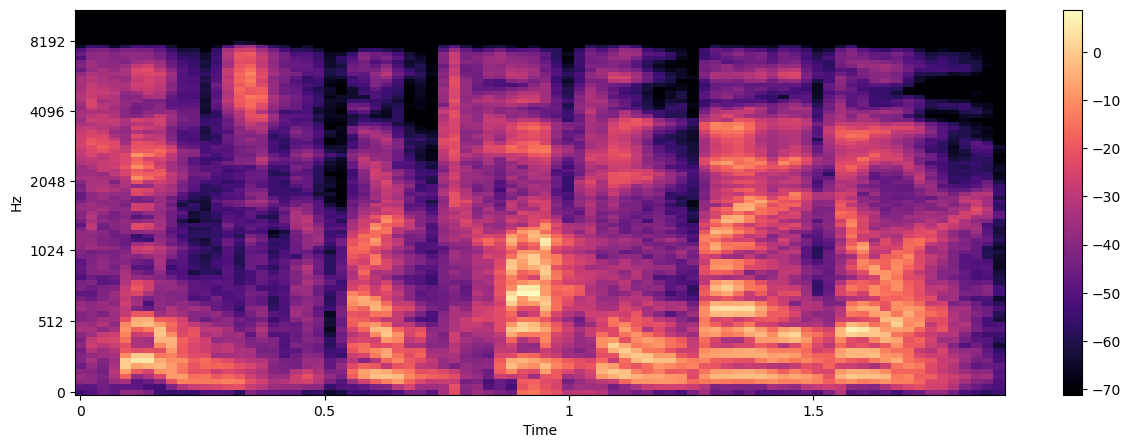

In [20]:
mel_spectrogram(angry, sr)

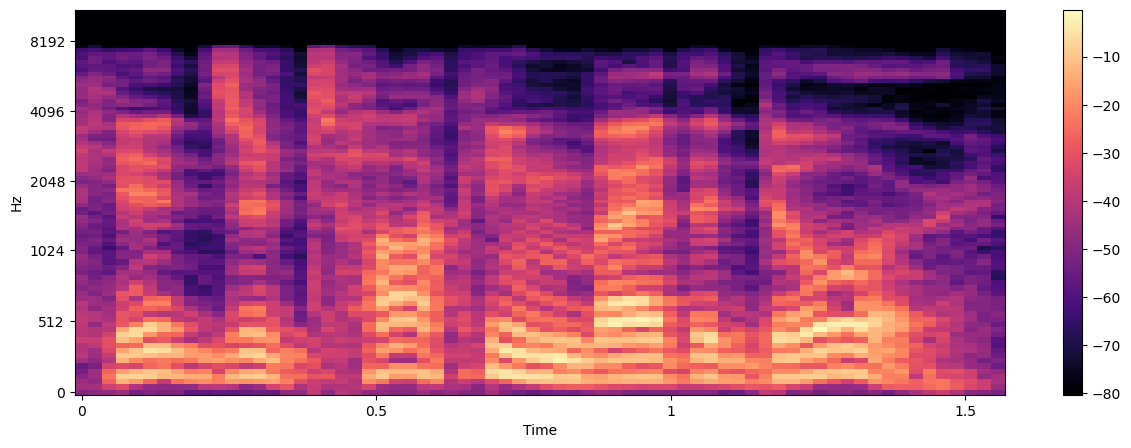

In [21]:
mel_spectrogram(happy, sr)

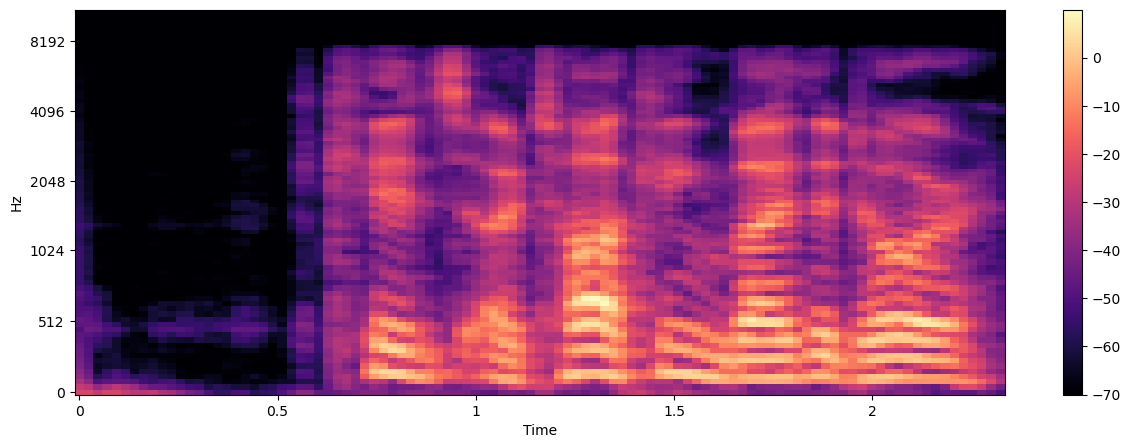

In [18]:
mel_spectrogram(fear, sr)

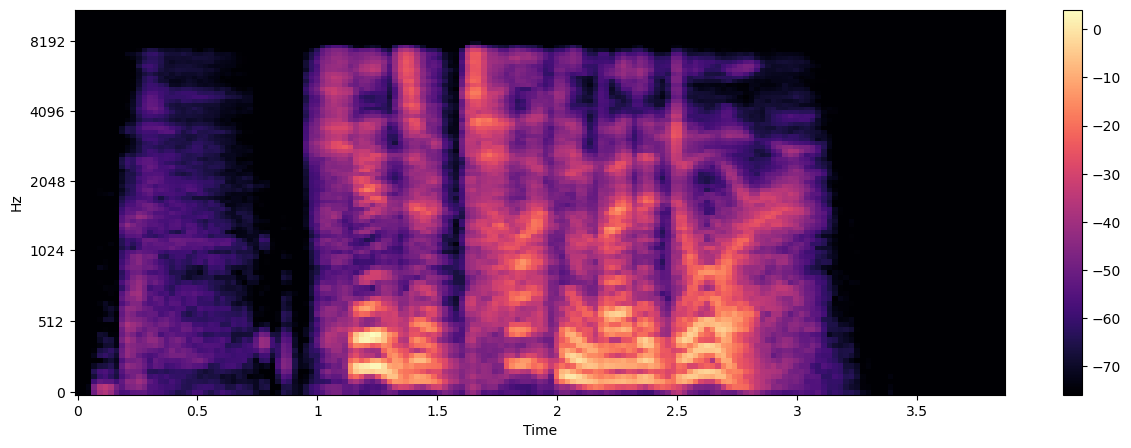

In [13]:
mel_spectrogram(disgust, sr)

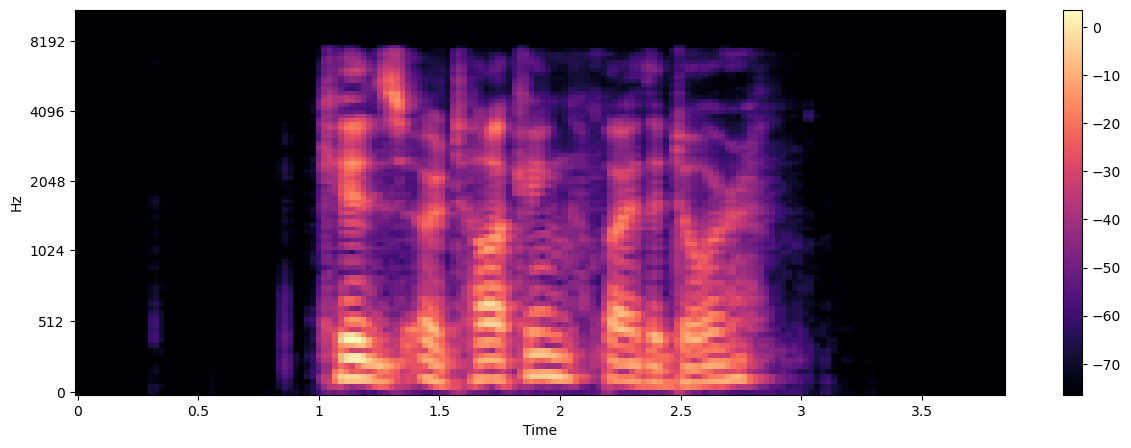

In [14]:
mel_spectrogram(sad, sr)